In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
bold_font = FontProperties(fname='fonts/Poppins-Bold.ttf')
regular_font = FontProperties(fname='fonts/Poppins-Regular.ttf')
semibold_font = FontProperties(fname='fonts/Poppins-SemiBold.ttf')
light_font = FontProperties(fname='fonts/Poppins-Light.ttf')
medium_font = FontProperties(fname='fonts/Poppins-Medium.ttf')

In [3]:
PATH="./data.csv"
data = pd.read_csv(PATH)

In [4]:
data.head()

,product_id,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,availability_status,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,In Stock,7,Spring,Yes,0.658145,Individual,Female
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",In Stock,54,Winter,No,4.734585,Bundle,Female
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",In Stock,31,Winter,No,2.024140,Bundle,Female
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,In Stock,49,Spring,No,3.869239,Individual,Other
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,In Stock,74,Winter,Yes,0.812489,Individual,Male


In [5]:
data = data.dropna()

In [6]:
D = data.where(data['category'] == 'Beauty & Hygiene').groupby('brand').aggregate({'product_rating': np.mean, 'product_type': 'count'})

In [7]:
D = D.sort_values(by='product_type', ascending=True)

In [8]:
D.head()

,product_rating,product_type
brand,,
109°F,3.2,1
Ikkai,4.5,1
Indus Valley,4.7,1
Intimus,2.5,1
Iodex,4.4,1


<BarContainer object of 6 artists>

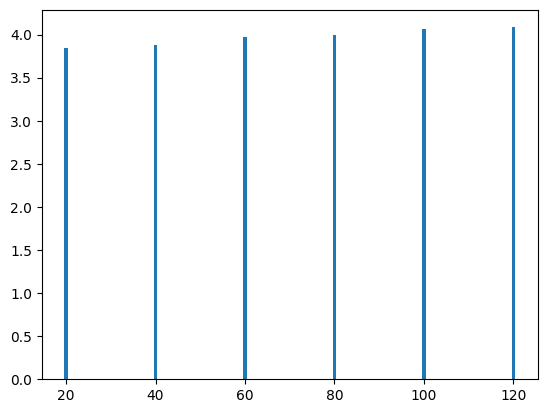

In [9]:
x = []
y = []
inc = 20
for i in range(0, 120, inc):
    x.append(i + inc)
    avg = D[(D['product_type'] >= i) & (D['product_type'] < i + inc)]['product_rating'].mean()
    y.append(avg)
plt.bar(x, y)


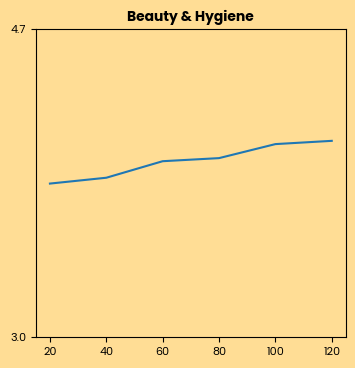

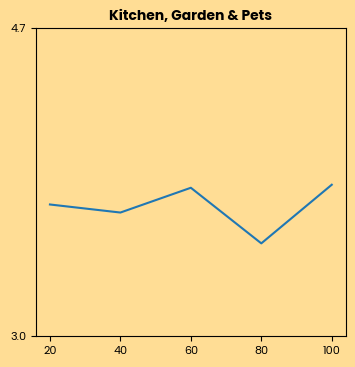

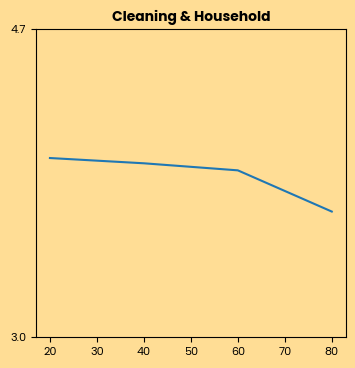

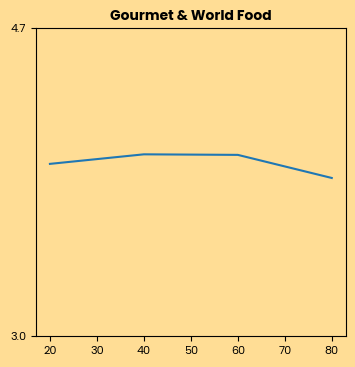

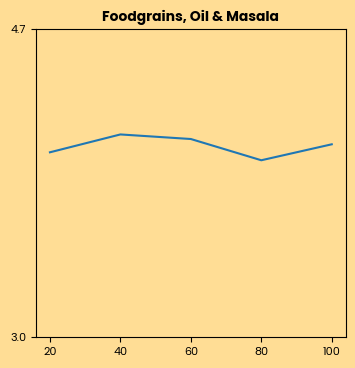

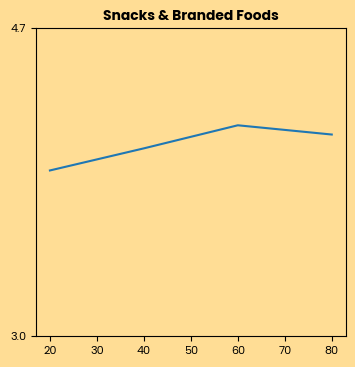

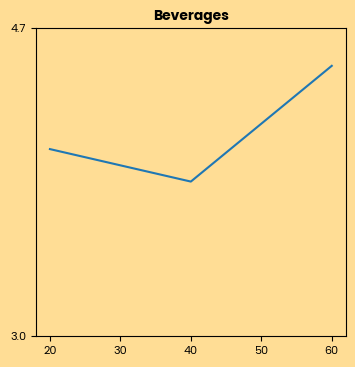

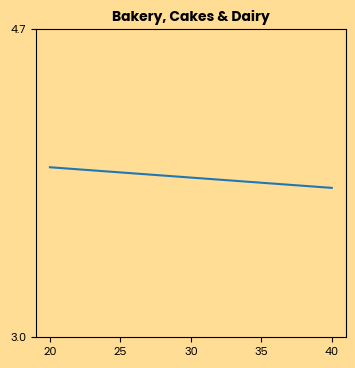

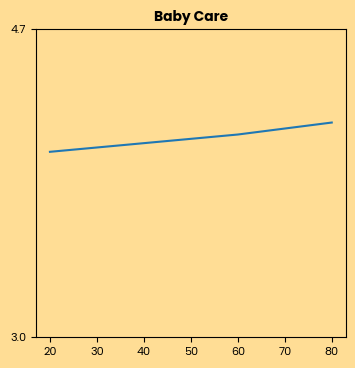

In [53]:


def viz(category, inc=20):
    D = data.where(data['category'] == category).groupby('brand').aggregate({'product_rating': np.mean, 'product_type': 'count'})
    D = D.sort_values(by='product_type', ascending=True)
    x = []
    y = []
    max = D['product_type'].max()
    if category == 'Foodgrains, Oil & Masala':
        max = 120
    elif category == 'Bakery, Cakes & Dairy':
        max = 60
    for i in range(0, max, inc):
        x.append(i + inc)
        avg = D[(D['product_type'] >= i) & (D['product_type'] < i + inc)]['product_rating'].mean()
        y.append(avg)
    
    plt.figure(figsize=[4, 4], facecolor='#ffdd95ff')
    plt.plot(x, y)
    plt.ylim(3, 4.7)
    plt.yticks([3, 4.7], fontproperties=regular_font, fontsize=8)
    # Set the axes background color
    plt.gca().set_facecolor('#ffdd95ff')
    plt.xticks(fontproperties=regular_font, fontsize=8)
    plt.title(category, fontproperties=bold_font)
    plt.savefig(f'./1/{category}.svg', format='svg')

for category in data['category'].unique():
    viz(category, 20)

In [54]:
1386 / (1386 + 15802 + 1652)

0.07356687898089172

In [12]:
data[(data['product_rating'] >= 0) & (data['product_rating'] < 3)]['product_id'].count()

1386

In [13]:
data[(data['product_rating'] >= 3.0) & (data['product_rating'] <= 4.7)]['product_id'].count()


15802

In [14]:
data[(data['product_rating'] > 4.7) & (data['product_rating'] <= 5)]['product_id'].count()


1652